## Import libraries

In [1]:
import sys
sys.path.append('..')
import itertools
import torch
from sklearn.metrics import confusion_matrix
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tqdm import tqdm_notebook
from torch.utils.data import DataLoader
from module.model import GaussianCnnPredictor
from module.tools import get_bbxes, denormalization, draw_bbx
import datasets.mvtec as mvtec

## Parameter setting

In [59]:
class_name = 'switch'
data_path = '../datasets/minebea'
save_path = '../mvtec_result'
arch = 'wide_resnet50_2'

## DataLoader

In [60]:
train_dataset = mvtec.MVTecDataset(data_path, class_name=class_name, is_train=True, ext='.png', resize = (600, 600), cropsize = 256)
train_dataloader = DataLoader(train_dataset, batch_size=32, pin_memory=True)
test_dataset = mvtec.MVTecDataset(data_path, class_name=class_name, is_train=False, ext='.png', resize = (600, 600), cropsize = 256)
test_dataloader = DataLoader(test_dataset, batch_size=32, pin_memory=True)

## Model

In [42]:
model = GaussianCnnPredictor(arch = arch)

## Train

In [43]:
model.fit(train_dataloader)

| feature extraction |:   0%|          | 0/10 [00:00<?, ?it/s]

fit start


| feature extraction |: 100%|██████████| 10/10 [00:13<00:00,  1.38s/it]


feature extraction done


  3%|▎         | 124/4096 [00:00<00:03, 1233.73it/s]

combined embedding features
selected embedding features
got embedding


100%|██████████| 4096/4096 [00:03<00:00, 1209.75it/s]


## Predict

In [44]:
heatmaps = model.predict(test_dataloader)

| feature extraction |:   0%|          | 0/29 [00:00<?, ?it/s]

predict start


| feature extraction |: 100%|██████████| 29/29 [00:40<00:00,  1.41s/it]


feature extraction done
combined embedding features


  0%|          | 1/4096 [00:00<07:05,  9.61it/s]

selected embedding features
got embedding


100%|██████████| 4096/4096 [02:12<00:00, 30.91it/s]


got distances


## Show results

In [45]:
test_imgs, labels = [], []
for (x, y) in tqdm_notebook(test_dataloader):
    test_imgs.extend(x.cpu().detach().numpy())
    labels.append(y.cpu().detach().numpy().tolist())
labels = list(itertools.chain.from_iterable(labels))

<ipython-input-45-635781d5ffe0>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for (x, y) in tqdm_notebook(test_dataloader):


  0%|          | 0/29 [00:00<?, ?it/s]

In [46]:
binaries, bbxes, judges = get_bbxes(heatmaps, 80, 20)
print(confusion_matrix(labels, judges))

[[  0   0]
 [640 282]]


1


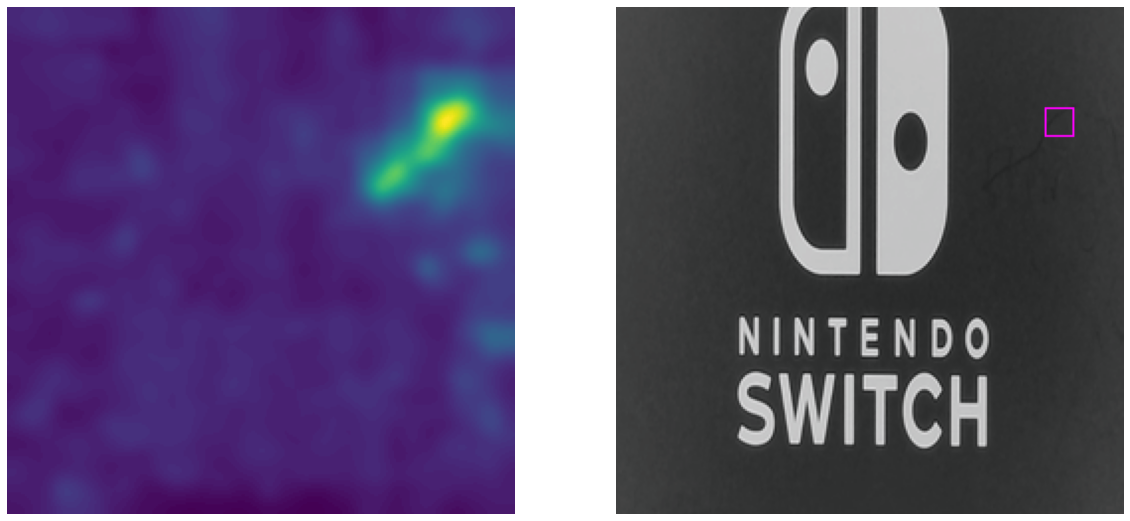

In [58]:
n = 702
img = test_imgs[n]
img = denormalization(img)
c_img = draw_bbx(img, bbxes[n])
plt.figure(figsize=(20,20))

print(labels[n])
# plt.subplot(3, 1, 1), plt.axis('off'), plt.imshow(img)
plt.subplot(1, 2, 1), plt.axis('off'), plt.imshow(heatmaps[n])
plt.subplot(1, 2, 2), plt.axis('off'), plt.imshow(c_img)
plt.show()